In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [3]:
cuacaT=cuaca.transpose()
cuacaT.tail(30)

,dew,humidity,pressure,temperature,timestamp,volt
1727697363,25.90,87.83,1011.71,28.11,1.727697e+09,4.05
1727697423,25.90,87.80,1011.74,28.12,1.727697e+09,4.05
1727697483,25.88,87.79,1011.74,28.10,1.727697e+09,4.05
1727697544,25.90,87.79,1011.75,28.12,1.727698e+09,4.05
1727697603,25.89,87.85,1011.73,28.10,1.727698e+09,4.05
1727697663,25.94,88.07,1011.74,28.10,1.727698e+09,4.05
1727697723,25.90,88.04,1011.74,28.07,1.727698e+09,4.06
1727697783,25.94,88.15,1011.74,28.09,1.727698e+09,4.05
1727697843,25.94,88.13,1011.75,28.09,1.727698e+09,4.05
1727697903,25.99,88.27,1011.76,28.11,1.727698e+09,4.06


In [4]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,410532.000000,410533.000000,410533.000000,410533.000000,4.105330e+05,410533.000000
mean,25.001378,85.682109,1011.431181,27.809860,1.715067e+09,4.091220
std,1.514366,11.167101,2.807409,3.284797,7.802540e+06,0.030871
min,17.670000,0.000000,0.000000,0.020000,0.000000e+00,0.000000
25%,24.130000,76.900000,1010.190000,25.390000,1.708647e+09,4.070000
50%,25.070000,90.110000,1011.480000,26.910000,1.715169e+09,4.090000
75%,26.050000,94.760000,1012.770000,30.290000,1.721404e+09,4.120000
max,29.700000,99.580000,1016.530000,41.120000,1.727699e+09,4.170000


In [5]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(30)

,dew,humidity,pressure,temperature,timestamp,volt
1727697363,25.90,87.83,1011.71,28.11,1727697363,4.05
1727697423,25.90,87.80,1011.74,28.12,1727697423,4.05
1727697483,25.88,87.79,1011.74,28.10,1727697483,4.05
1727697544,25.90,87.79,1011.75,28.12,1727697544,4.05
1727697603,25.89,87.85,1011.73,28.10,1727697603,4.05
1727697663,25.94,88.07,1011.74,28.10,1727697663,4.05
1727697723,25.90,88.04,1011.74,28.07,1727697723,4.06
1727697783,25.94,88.15,1011.74,28.09,1727697783,4.05
1727697843,25.94,88.13,1011.75,28.09,1727697843,4.05
1727697903,25.99,88.27,1011.76,28.11,1727697903,4.06


In [6]:
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1727698564,26.02,88.34,1011.81,28.13,2024-09-30 12:16:04,4.05
1727698623,25.98,88.33,1011.83,28.09,2024-09-30 12:17:03,4.05
1727698684,26.01,88.39,1011.81,28.11,2024-09-30 12:18:04,4.05
1727698743,25.99,88.40,1011.83,28.09,2024-09-30 12:19:03,4.05
1727698804,25.97,88.31,1011.88,28.09,2024-09-30 12:20:04,4.05
1727698864,25.98,88.30,1011.91,28.10,2024-09-30 12:21:04,4.05
1727698924,26.01,88.49,1011.92,28.09,2024-09-30 12:22:04,4.05
1727698983,26.00,88.54,1011.95,28.07,2024-09-30 12:23:03,4.05
1727699044,26.01,88.61,1011.98,28.07,2024-09-30 12:24:04,4.06
1727699103,26.02,88.64,1012.04,28.07,2024-09-30 12:25:03,4.06


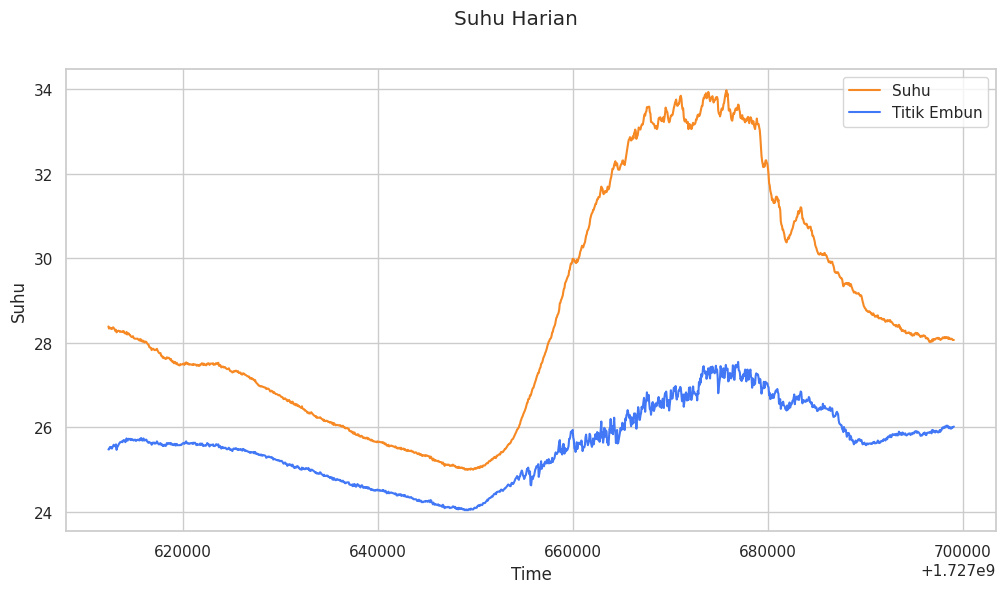

In [7]:
plt.rcParams["figure.figsize"] = (12,6)
jam = 24
def plot_data(data, variable, color, label, last_n_points):
    """
    Plots a line chart for a specific variable.
    Parameters:
    - data (dict): A dictionary containing the data.
    - variable (str): The variable to plot.
    - color (str): The color of the line.
    - label (str): The label for the line in the legend.
    - last_n_points (int): The number of last points to plot.
    """
    plt.plot(data[variable].tail(last_n_points), color=color, label=label)

# Contoh penggunaan fungsi
plot_data(cuacaT, 'temperature', '#f68923', 'Suhu',60*jam)
plot_data(cuacaT, 'dew', '#4278f5', 'Titik Embun',60*jam)

# Menambahkan judul dan label sumbu
plt.suptitle("Suhu Harian")
plt.xlabel('Time')
plt.ylabel('Suhu')

# Menambahkan legenda
plt.legend()

# Menyimpan gambar ke file 'grafik_Suhu.png'
plt.savefig('grafik_Suhu.png')

# Menampilkan plot
plt.show()

In [8]:
import plotly.graph_objects as go

temperature = cuacaT['temperature'].tail(60*jam)
humidity = cuacaT['humidity'].tail(60*jam)
pressure = cuacaT['pressure'].tail(60*jam)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temperature,
    y=humidity,
    z=pressure,
    mode='markers',
    marker=dict(
        size=5,
        color=temperature,              # Color by temperature
        colorscale='Viridis',           # Colormap
        opacity=0.8
    )
)])

# Add labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Temperature (°C)',
        yaxis_title='Humidity (%)',
        zaxis_title='Pressure (hPa)'
    ),
    title='3D Scatter Plot of Temperature, Humidity, and Pressure'
)

# Show the plot
fig.show()


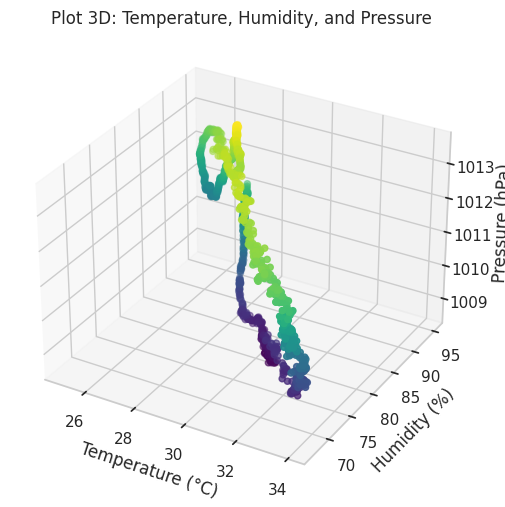

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = temperature = cuacaT['temperature'].tail(60*jam)
y = humidity = cuacaT['humidity'].tail(60*jam)
z = pressure = cuacaT['pressure'].tail(60*jam)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Pressure (hPa)')

# Add a title
ax.set_title('Plot 3D: Temperature, Humidity, and Pressure')

# Show the plot
plt.show()


In [10]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
# Menyimpan 1000 data terakhir dari DataFrame cuacaT ke file CSV
cuacaT.tail(1000).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [11]:
datacuaca = (lambda: _deepnote_execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
datacuaca

,dew,humidity,pressure,temperature,timestamp,volt
0,24.59,93.27,1010.76,25.76,2024-09-29 19:40:54,4.04
1,24.58,93.27,1010.75,25.75,2024-09-29 19:41:54,4.04
2,24.55,93.29,1010.73,25.72,2024-09-29 19:42:54,4.04
3,24.58,93.32,1010.69,25.74,2024-09-29 19:43:54,4.04
4,24.56,93.33,1010.72,25.72,2024-09-29 19:44:54,4.05
...,...,...,...,...,...,...
995,25.98,88.30,1011.91,28.10,2024-09-30 12:21:04,4.05
996,26.01,88.49,1011.92,28.09,2024-09-30 12:22:04,4.05
997,26.00,88.54,1011.95,28.07,2024-09-30 12:23:03,4.05
998,26.01,88.61,1011.98,28.07,2024-09-30 12:24:04,4.06


In [12]:
(lambda: DeepnoteChart(datacuaca, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(datacuaca, """{"mark":{"type":"bar","tooltip":true},"width":"container","config":{"customFormatTypes":true},"height":"container","$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear"},"format":{"type":"default","decimals":null}}},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [18]:
import requests
import pandas as pd

# Konfigurasi API ThingSpeak
channel_id = 2326256
read_api_key = 'BKIJNOYDM205J2HG'
url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json'

# Parameter untuk permintaan API
params = {
    'api_key': read_api_key,
    'results': 100  # Jumlah data yang ingin diambil, bisa disesuaikan
}

# Mengirim permintaan GET ke ThingSpeak
response = requests.get(url, params=params)

# Cek apakah permintaan berhasil
if response.status_code == 200:
    # Mengambil data feed dalam format JSON
    data = response.json()
    feeds = data['feeds']
    
    # Membuat DataFrame Pandas dari data feed
    df = pd.DataFrame(feeds)
    
    # Pilih kolom-kolom yang ingin disimpan, misalnya waktu dan field1 hingga field8
    df = df[['created_at', 'field1', 'field2', 'field3', 'field4', 'field8']]
    
    # Ganti nama kolom untuk lebih deskriptif
    df.columns = ['Time', 'Suhu', 'Kelembapan', 'Tekanan', 'Embun', 'Volt']
    
    # Simpan DataFrame ke file CSV
    df.to_csv('Cuaca.csv', index=False)
    
    # Tampilkan DataFrame untuk pengecekan
    print(df.head())
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")


                   Time   Suhu Kelembapan  Tekanan  Embun  Volt
0  2024-09-30T10:51:02Z  28.43      86.18  1010.57  25.90  4.06
1  2024-09-30T10:52:02Z  28.41      86.19  1010.58  25.88  4.05
2  2024-09-30T10:53:03Z  28.34      86.28  1010.62  25.83  4.05
3  2024-09-30T10:54:02Z  28.36      86.36  1010.62  25.86  4.06
4  2024-09-30T10:55:02Z  28.32      86.51  1010.61  25.85  4.06


In [19]:
dataIklim = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'Cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'Cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
dataIklim

,Time,Suhu,Kelembapan,Tekanan,Embun,Volt
0,2024-09-30 10:51:02,28.43,86.18,1010.57,25.90,4.06
1,2024-09-30 10:52:02,28.41,86.19,1010.58,25.88,4.05
2,2024-09-30 10:53:03,28.34,86.28,1010.62,25.83,4.05
3,2024-09-30 10:54:02,28.36,86.36,1010.62,25.86,4.06
4,2024-09-30 10:55:02,28.32,86.51,1010.61,25.85,4.06
...,...,...,...,...,...,...
95,2024-09-30 12:27:03,28.06,88.64,1012.07,26.01,4.05
96,2024-09-30 12:28:03,28.06,88.74,1012.04,26.03,4.05
97,2024-09-30 12:29:03,28.04,88.80,1012.07,26.02,4.06
98,2024-09-30 12:30:03,28.06,88.81,1012.11,26.04,4.05


In [20]:
(lambda: DeepnoteChart(dataIklim, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Suhu","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Kelembapan","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(dataIklim, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Suhu","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Kelembapan","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>